# Data Challenge

## Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
df = pd.read_pickle('Datos_data_challenge.pkl')

In [3]:
df

{'flow': array([1.72378057e+00, 9.60881602e-01, 1.00000000e-03, ...,
        3.55681843e+00, 3.40213266e+00, 1.81279569e+00]),
 'obs_tas': array([[-10.60000038,  -9.69999981,  -6.69999981, ...,  -8.10000038,
          -6.5       ,  -5.4000001 ],
        [-20.5       , -19.10000038, -12.        , ..., -15.5       ,
         -11.80000019,  -9.10000038],
        [-23.60000038, -22.5       , -15.10000038, ..., -19.39999962,
         -14.60000038, -12.19999981],
        ...,
        [-11.89999962, -11.39999962,  -8.39999962, ...,  -9.30000019,
          -7.19999981,  -6.30000019],
        [ -7.        ,  -6.5       ,  -3.4000001 , ...,  -5.        ,
          -3.79999995,  -3.        ],
        [ -2.4000001 ,  -2.0999999 ,   1.29999995, ...,  -0.89999998,
           0.5       ,   1.10000002]]),
 'flow_dates': 1958-01-04   1958-01-04
 1958-01-05   1958-01-05
 1958-01-06   1958-01-06
 1958-01-07   1958-01-07
 1958-01-08   1958-01-08
                 ...    
 2016-12-22   2016-12-22
 2016-12-2

In [4]:
target=pd.DataFrame.from_dict(df['flow'])
target.columns=['Flow']
target.shape

(21542, 1)

In [5]:
target_dates=pd.DataFrame.from_dict(df['flow_dates'])
target_dates.columns=['Flow_Dates']
target_dates.index=range(len(target_dates))
target_dates.shape

(21542, 1)

In [6]:
target['Dates']=target_dates['Flow_Dates']
target=target.set_index('Dates')
target.head()

,Flow
Dates,
1958-01-04,1.723781
1958-01-05,0.960882
1958-01-06,0.001000
1958-01-07,0.001000
1958-01-08,0.316796


In [7]:
target_lon_lat=pd.DataFrame.from_dict(df['obs_lon_lat'])
target_lon_lat

,0
0,9.37
1,60.23


In [8]:
pred_temp=pd.DataFrame.from_dict(df['obs_tas'])
pred_temp.columns=['Temp1','Temp2','Temp3','Temp4','Temp5','Temp6','Temp7','Temp8','Temp9']
pred_temp.shape

(21546, 9)

In [9]:
pred_prec=pd.DataFrame.from_dict(df['obs_pr'])
pred_prec.columns=['Prec1','Prec2','Prec3','Prec4','Prec5','Prec6','Prec7','Prec8','Prec9']
pred_prec.shape

(21546, 9)

In [10]:
pred_dates=pd.DataFrame.from_dict(df['obs_dates'])
pred_dates.columns=['Observation_Dates']
pred_dates.index=range(len(pred_dates))
pred_dates.shape

(21546, 1)

In [11]:
pred=pred_temp
pred[['Prec1','Prec2','Prec3','Prec4','Prec5','Prec6','Prec7','Prec8','Prec9']]=pred_prec[['Prec1','Prec2','Prec3','Prec4','Prec5','Prec6','Prec7','Prec8','Prec9']]
pred['Dates']=pred_dates['Observation_Dates']
pred=pred.set_index('Dates')
pred.head()

,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,Temp7,Temp8,Temp9,Prec1,Prec2,Prec3,Prec4,Prec5,Prec6,Prec7,Prec8,Prec9
Dates,,,,,,,,,,,,,,,,,,
1957-01-01,-10.600000,-9.7,-6.7,-8.800000,-8.900000,-7.500000,-8.1,-6.5,-5.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1
1957-01-02,-20.500000,-19.1,-12.0,-17.700001,-17.700001,-13.100000,-15.5,-11.8,-9.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.1
1957-01-03,-23.600000,-22.5,-15.1,-21.400000,-21.400000,-16.299999,-19.4,-14.6,-12.2,0.1,0.0,0.3,0.1,0.3,0.3,0.4,0.3,0.5
1957-01-04,-16.200001,-16.0,-14.1,-15.600000,-15.400000,-14.500000,-15.0,-13.8,-11.9,1.0,0.0,1.0,1.1,0.9,0.7,0.8,0.4,0.6
1957-01-05,-7.900000,-7.8,-9.5,-7.600000,-7.500000,-8.000000,-7.4,-8.6,-8.2,9.3,8.6,8.0,8.9,8.7,10.2,9.3,10.1,9.7


In [12]:
df_full=pd.concat([target,pred],axis=1)
df_full.head()

,Flow,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,Temp7,Temp8,Temp9,Prec1,Prec2,Prec3,Prec4,Prec5,Prec6,Prec7,Prec8,Prec9
Dates,,,,,,,,,,,,,,,,,,,
1957-01-01,NaN,-10.600000,-9.7,-6.7,-8.800000,-8.900000,-7.500000,-8.1,-6.5,-5.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1
1957-01-02,NaN,-20.500000,-19.1,-12.0,-17.700001,-17.700001,-13.100000,-15.5,-11.8,-9.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.1
1957-01-03,NaN,-23.600000,-22.5,-15.1,-21.400000,-21.400000,-16.299999,-19.4,-14.6,-12.2,0.1,0.0,0.3,0.1,0.3,0.3,0.4,0.3,0.5
1957-01-04,NaN,-16.200001,-16.0,-14.1,-15.600000,-15.400000,-14.500000,-15.0,-13.8,-11.9,1.0,0.0,1.0,1.1,0.9,0.7,0.8,0.4,0.6
1957-01-05,NaN,-7.900000,-7.8,-9.5,-7.600000,-7.500000,-8.000000,-7.4,-8.6,-8.2,9.3,8.6,8.0,8.9,8.7,10.2,9.3,10.1,9.7


In [13]:
print('Shape of dataframe:',df_full.shape)
df_full.isna().sum()

Shape of dataframe: (21910, 19)


Flow     368
Temp1    364
Temp2    364
Temp3    364
Temp4    364
Temp5    364
Temp6    364
Temp7    364
Temp8    364
Temp9    364
Prec1    364
Prec2    364
Prec3    364
Prec4    364
Prec5    364
Prec6    364
Prec7    364
Prec8    364
Prec9    364
dtype: int64

#### Missing data

In [14]:
df_clean=df_full.dropna()
df_clean.head()

,Flow,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,Temp7,Temp8,Temp9,Prec1,Prec2,Prec3,Prec4,Prec5,Prec6,Prec7,Prec8,Prec9
Dates,,,,,,,,,,,,,,,,,,,
1958-01-04,1.723781,-12.8,-13.000000,-13.0,-12.5,-12.500000,-12.7,-12.000000,-12.5,-12.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1958-01-05,0.960882,-7.8,-7.900000,-8.4,-7.0,-7.300000,-8.6,-6.500000,-7.7,-8.3,2.0,2.2,3.0,3.3,3.7,0.7,3.1,4.2,1.1
1958-01-06,0.001000,-11.0,-9.900000,-6.5,-8.5,-9.000000,-7.4,-7.900000,-6.8,-5.8,12.7,11.0,16.5,12.5,11.2,12.2,14.1,14.2,10.5
1958-01-07,0.001000,-13.2,-12.200000,-7.9,-10.7,-11.300000,-9.8,-10.100000,-8.5,-7.4,6.6,6.9,9.6,7.3,6.5,5.2,10.4,5.7,3.7
1958-01-08,0.316796,-19.9,-19.299999,-15.4,-18.4,-18.700001,-16.9,-17.700001,-15.9,-14.9,3.4,3.6,2.7,3.5,3.8,3.3,2.9,4.0,3.5


In [15]:
X_clean=df_clean.loc[:,df_clean.columns!='Flow']
Y_clean=df_clean.loc[:,df_clean.columns=='Flow']

#### Verify correlation among variables

In [16]:
df_clean.corr()

,Flow,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,Temp7,Temp8,Temp9,Prec1,Prec2,Prec3,Prec4,Prec5,Prec6,Prec7,Prec8,Prec9
Flow,1.000000,0.321395,0.328661,0.347238,0.331841,0.331223,0.340982,0.334333,0.346066,0.353181,0.214393,0.215766,0.222361,0.223283,0.218239,0.208095,0.218854,0.209890,0.200689
Temp1,0.321395,1.000000,0.998956,0.977156,0.996456,0.997461,0.990467,0.994349,0.982109,0.971150,0.116400,0.110172,0.109049,0.114553,0.107296,0.090989,0.104836,0.092479,0.087871
Temp2,0.328661,0.998956,1.000000,0.982988,0.998648,0.999480,0.994931,0.997284,0.987611,0.977994,0.115857,0.109712,0.108717,0.114058,0.106960,0.090575,0.104553,0.092335,0.087635
Temp3,0.347238,0.977156,0.982988,1.000000,0.988485,0.986217,0.993135,0.991132,0.998233,0.996440,0.132477,0.125441,0.124473,0.130504,0.123710,0.106679,0.121591,0.109213,0.103655
Temp4,0.331841,0.996456,0.998648,0.988485,1.000000,0.999552,0.996896,0.999492,0.991544,0.982389,0.119051,0.112649,0.111583,0.117214,0.110174,0.093597,0.107691,0.095358,0.090506
Temp5,0.331223,0.997461,0.999480,0.986217,0.999552,1.000000,0.996800,0.998846,0.990508,0.981441,0.116358,0.110146,0.109140,0.114523,0.107481,0.091055,0.105057,0.092816,0.088088
Temp6,0.340982,0.990467,0.994931,0.993135,0.996896,0.996800,1.000000,0.998118,0.996885,0.991050,0.119597,0.113164,0.112489,0.117749,0.110771,0.093963,0.108584,0.096431,0.091323
Temp7,0.334333,0.994349,0.997284,0.991132,0.999492,0.998846,0.998118,1.000000,0.994130,0.985909,0.119951,0.113462,0.112269,0.118000,0.110977,0.094312,0.108508,0.096177,0.091289
Temp8,0.346066,0.982109,0.987611,0.998233,0.991544,0.990508,0.996885,0.994130,1.000000,0.997029,0.127347,0.120402,0.119536,0.125286,0.118328,0.101300,0.116224,0.103903,0.098589
Temp9,0.353181,0.971150,0.977994,0.996440,0.982389,0.981441,0.991050,0.985909,0.997029,1.000000,0.134170,0.126923,0.126328,0.132141,0.125152,0.107952,0.123297,0.110678,0.105094


<AxesSubplot:>

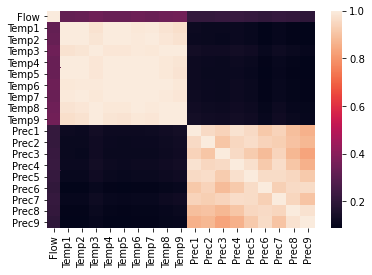

In [17]:
sns.heatmap(df_clean.corr())

#### Standard Scaler

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_standard=pd.DataFrame(scaler.fit_transform(df_clean))
df_standard.columns=df_clean.columns
df_standard=df_standard.set_index(df_clean.index)
df_standard.head()

,Flow,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,Temp7,Temp8,Temp9,Prec1,Prec2,Prec3,Prec4,Prec5,Prec6,Prec7,Prec8,Prec9
Dates,,,,,,,,,,,,,,,,,,,
1958-01-04,-0.537020,-1.543722,-1.633329,-1.765668,-1.632089,-1.626858,-1.743006,-1.619875,-1.743739,-1.833603,-0.494686,-0.461787,-0.461790,-0.485329,-0.476204,-0.451155,-0.479671,-0.439783,-0.435153
1958-01-05,-0.615953,-0.938483,-1.025951,-1.257388,-0.990424,-1.012721,-1.267016,-0.978483,-1.198104,-1.320170,0.002104,0.044260,0.205379,0.238365,0.301642,-0.308555,0.165199,0.334556,-0.222973
1958-01-06,-0.715267,-1.325836,-1.264139,-1.047446,-1.165423,-1.213497,-1.127702,-1.141747,-1.095798,-1.041131,2.659932,2.068449,3.207641,2.255938,1.878359,2.034152,2.453450,2.178219,1.590197
1958-01-07,-0.715267,-1.592141,-1.538054,-1.202140,-1.422089,-1.485134,-1.406330,-1.398304,-1.289043,-1.219716,1.144722,1.125361,1.673152,1.115571,0.890283,0.608156,1.683766,0.611105,0.278542
1958-01-08,-0.682593,-2.403162,-2.383621,-2.030858,-2.320421,-2.359098,-2.230606,-2.284591,-2.130230,-2.056834,0.349857,0.366290,0.138662,0.282225,0.322665,0.221100,0.123595,0.297682,0.239964


In [19]:
X_standard=df_standard.loc[:,df_standard.columns!='Flow']
Y_standard=df_standard.loc[:,df_standard.columns=='Flow']

## Dimensionality reduction

### 1. PCA

In [20]:
from sklearn.decomposition import PCA

pca_18=PCA(n_components=18)
pca_18.fit(X_standard)
X_pca_18=pca_18.transform(X_standard)
np.cumsum(pca_18.explained_variance_ratio_)*100

array([ 53.9170354 ,  96.52135544,  98.15913437,  98.77081099,
        99.08199373,  99.3764215 ,  99.6030453 ,  99.74032153,
        99.8483835 ,  99.90523118,  99.94417991,  99.9681509 ,
        99.98718959,  99.99333542,  99.99690055,  99.99905749,
        99.99964117, 100.        ])

Text(0, 0.5, 'Explained variance')

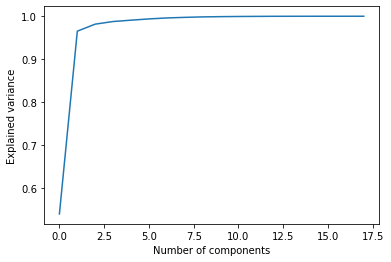

In [21]:
plt.plot(np.cumsum(pca_18.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

In [22]:
pca_2=PCA(n_components=2)
pca_2.fit(X_standard)
X_pca_2=pca_2.transform(X_standard)

In [23]:
df_pca_2=pd.DataFrame(X_pca_2,columns=['PC1','PC2'])
df_pca_2=df_pca_2.set_index(df_clean.index)
df_pca_2.head()

,PC1,PC2
Dates,,
1958-01-04,-4.838627,2.003017
1958-01-05,-2.465882,2.246158
1958-01-06,1.433465,7.472585
1958-01-07,-1.416213,4.972305
1958-01-08,-4.826093,4.760083


### 2. Daily mean

In [24]:
X_mean=pd.DataFrame(columns=['TempMean','PrecMean'])
X_mean['TempMean']=X_clean[['Temp1','Temp2','Temp3','Temp4','Temp5','Temp6','Temp7','Temp8','Temp9']].mean(axis=1)
X_mean['PrecMean']=X_clean[['Prec1','Prec2','Prec3','Prec4','Prec5','Prec6','Prec7','Prec8','Prec9']].mean(axis=1)
X_mean.tail()

,TempMean,PrecMean
Dates,,
2015-12-27,-9.944444,0.555556
2015-12-28,-10.288889,4.888889
2015-12-29,-9.411111,1.277778
2015-12-30,-5.055556,3.444444
2015-12-31,-0.733333,8.322222


## Working with different time periods

#### P0: 1958-1965

In [25]:
Y_P0=Y_clean['1958-01-04':'1965-12-31']
X_pca_2_P0=df_pca_2['1958-01-04':'1965-12-31']
X_mean_P0=X_mean['1958-01-04':'1965-12-31']

df_P0=Y_P0
df_P0=df_P0.merge(X_pca_2_P0,left_index=True,right_index=True)
df_P0=df_P0.merge(X_mean_P0,left_index=True,right_index=True)
df_P0

,Flow,PC1,PC2,TempMean,PrecMean
Dates,,,,,
1958-01-04,1.723781,-4.838627,2.003017,-12.655556,0.000000
1958-01-05,0.960882,-2.465882,2.246158,-7.722222,2.588889
1958-01-06,0.001000,1.433465,7.472585,-8.088889,12.766667
1958-01-07,0.001000,-1.416213,4.972305,-10.122222,6.877778
1958-01-08,0.316796,-4.826093,4.760083,-17.455555,3.411111
...,...,...,...,...,...
1965-12-27,0.596520,-3.432387,1.275068,-8.166667,0.500000
1965-12-28,0.001000,-3.824447,1.210139,-8.966667,0.000000
1965-12-29,1.304501,-4.707989,1.898279,-12.200000,0.000000


In [26]:
df_P0.to_csv('P0.csv')

#### P1: 1966-1975

In [27]:
Y_P1=Y_clean['1966-01-01':'1975-12-31']
X_pca_2_P1=df_pca_2['1966-01-01':'1975-12-31']
X_mean_P1=X_mean['1966-01-01':'1975-12-31']

df_P1=Y_P1
df_P1=df_P1.merge(X_pca_2_P1,left_index=True,right_index=True)
df_P1=df_P1.merge(X_mean_P1,left_index=True,right_index=True)
df_P1

,Flow,PC1,PC2,TempMean,PrecMean
Dates,,,,,
1966-01-01,0.957278,-6.772994,3.514219,-19.700000,0.000000
1966-01-02,0.292607,-3.555349,6.601805,-17.877778,6.933333
1966-01-03,0.887541,-4.317714,2.974417,-13.155555,1.722222
1966-01-04,0.243283,-5.945968,3.121047,-17.122222,0.355556
1966-01-05,0.001000,-5.820982,2.764176,-16.277778,0.000000
...,...,...,...,...,...
1975-12-27,2.591555,-0.442501,-1.427722,3.388889,0.000000
1975-12-28,1.057908,0.967145,-0.666041,5.244444,2.188889
1975-12-29,1.790253,-1.013831,-0.922247,1.233333,0.066667


In [28]:
df_P1.to_csv('P1.csv')

#### P2: 1976-1985

In [29]:
Y_P2=Y_clean['1976-01-01':'1985-12-31']
X_pca_2_P2=df_pca_2['1976-01-01':'1985-12-31']
X_mean_P2=X_mean['1976-01-01':'1985-12-31']

df_P2=Y_P2
df_P2=df_P2.merge(X_pca_2_P2,left_index=True,right_index=True)
df_P2=df_P2.merge(X_mean_P2,left_index=True,right_index=True)
df_P2

,Flow,PC1,PC2,TempMean,PrecMean
Dates,,,,,
1976-01-01,0.001000,-2.483589,0.218334,-4.111111,0.055556
1976-01-02,2.731739,-4.022321,1.368835,-9.655556,0.000000
1976-01-03,0.001000,-2.427198,4.104144,-10.900000,4.900000
1976-01-04,2.281954,-3.798439,1.652717,-9.655556,0.533333
1976-01-05,2.559915,-0.947956,5.848691,-10.644445,8.466667
...,...,...,...,...,...
1985-12-27,0.667147,-5.155617,2.247052,-13.833333,0.000000
1985-12-28,2.045358,-5.669300,2.646277,-15.722222,0.000000
1985-12-29,0.431902,-6.660265,3.421583,-19.322222,0.000000


In [30]:
df_P2.to_csv('P2.csv')

#### P3: 1986-1995

In [31]:
Y_P3=Y_clean['1986-01-01':'1995-12-31']
X_pca_2_P3=df_pca_2['1986-01-01':'1995-12-31']
X_mean_P3=X_mean['1986-01-01':'1995-12-31']

df_P3=Y_P3
df_P3=df_P3.merge(X_pca_2_P3,left_index=True,right_index=True)
df_P3=df_P3.merge(X_mean_P3,left_index=True,right_index=True)
df_P3

,Flow,PC1,PC2,TempMean,PrecMean
Dates,,,,,
1986-01-01,1.189232,-6.045869,2.949087,-17.100000,0.011111
1986-01-02,0.850611,-3.644955,3.759203,-13.066667,3.333333
1986-01-03,1.971743,-4.214263,2.201632,-11.544444,0.911111
1986-01-04,0.584624,-4.509086,1.938338,-11.766667,0.233333
1986-01-05,0.273007,-5.590045,2.590602,-15.388889,0.000000
...,...,...,...,...,...
1995-12-27,0.359247,-6.375081,3.201453,-18.266667,0.000000
1995-12-28,0.001000,-6.375770,3.200681,-18.277778,0.000000
1995-12-29,0.001000,-5.742174,2.703419,-15.988889,0.000000


In [32]:
df_P3.to_csv('P3.csv')

#### P4: 1996-2005

In [33]:
Y_P4=Y_clean['1996-01-01':'2005-12-31']
X_pca_2_P4=df_pca_2['1996-01-01':'2005-12-31']
X_mean_P4=X_mean['1996-01-01':'2005-12-31']

df_P4=Y_P4
df_P4=df_P4.merge(X_pca_2_P4,left_index=True,right_index=True)
df_P4=df_P4.merge(X_mean_P4,left_index=True,right_index=True)
df_P4

,Flow,PC1,PC2,TempMean,PrecMean
Dates,,,,,
1996-01-01,0.103315,-5.323566,2.391462,-14.422222,0.011111
1996-01-02,0.837773,-6.680726,3.484584,-19.411111,0.055556
1996-01-03,0.001000,-7.366921,3.976385,-21.877778,0.000000
1996-01-04,0.080188,-6.374318,3.197607,-18.288889,0.000000
1996-01-05,0.001000,-6.201040,3.062403,-17.655556,0.000000
...,...,...,...,...,...
2005-12-27,2.377708,-4.017455,1.368718,-9.611111,0.000000
2005-12-28,1.289865,-5.901267,2.839747,-16.477778,0.000000
2005-12-29,1.456544,-4.620273,2.280526,-12.611111,0.544444


In [34]:
df_P4.to_csv('P4.csv')

#### P5: 2006-2015

In [35]:
Y_P5=Y_clean['2006-01-01':'2015-12-31']
X_pca_2_P5=df_pca_2['2006-01-01':'2015-12-31']
X_mean_P5=X_mean['2006-01-01':'2015-12-31']

df_P5=Y_P5
df_P5=df_P5.merge(X_pca_2_P5,left_index=True,right_index=True)
df_P5=df_P5.merge(X_mean_P5,left_index=True,right_index=True)
df_P5

,Flow,PC1,PC2,TempMean,PrecMean
Dates,,,,,
2006-01-01,1.645988,-2.784171,1.596034,-7.255556,1.444444
2006-01-02,0.524779,-4.414799,1.675162,-11.088889,0.000000
2006-01-03,1.044880,-5.448337,2.479538,-14.877778,0.000000
2006-01-04,0.336798,-4.895971,2.046361,-12.877778,0.000000
2006-01-05,0.271258,-4.724241,1.930925,-12.255555,0.022222
...,...,...,...,...,...
2015-12-27,2.177040,-3.863827,1.738282,-9.944444,0.555556
2015-12-28,4.876250,-2.232029,4.016859,-10.288889,4.888889
2015-12-29,4.998840,-3.430610,1.992918,-9.411111,1.277778


In [36]:
df_P5.to_csv('P5.csv')

## Model Training

### 1. K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans

k=2
kmeans = KMeans(n_clusters=k).fit(X_pca_2)

In [ ]:
plt.scatter(X_pca_2[:,0],X_pca_2[:,1],c = kmeans.labels_)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],marker = '^', c = 'r')
plt.axis('scaled')
plt.show()

### 2. Simplicial Complexes

In [ ]:
import networkx as nx
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

In [ ]:
from sklearn.metrics import pairwise_distances

D = pairwise_distances(X_pca_2)
plt.imshow(D)
plt.show()

In [ ]:
def create_simplicial_complex(D,r):
    """
    Input: distance matrix and nonnegative radius
    Output: networkx graph 
    """
    
    G = nx.Graph()
    G.add_nodes_from(list(range(len(D))))
    edge_list = np.argwhere(D <= r) 
    G.add_edges_from(edge_list)
    
    # Remove self-loops
    G.remove_edges_from(nx.selfloop_edges(G))
    
    return G

In [ ]:
r=0.5
G = create_simplicial_complex(D,r)
pos = {n:X_pca_2[n,:] for n in range(len(X_pca_2))}
plt.figure(figsize = (20,20))
nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 20)
plt.axis('equal')
plt.show()

### 3. Persistent Homology

### 4. Persistent Diagrams

### 5. Persistent Barcodes

### 6. Time series signal to point cloud